In [1]:
# library
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dstitanic = pd.read_csv('penumpang.csv',sep=';',engine='python')
dstitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,144.542,NaN,C
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,77.417,NaN,Q
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,78.542,NaN,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26,NaN,S


In [3]:
dstitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  707 non-null    int64  
 1   Survived     707 non-null    int64  
 2   Pclass       707 non-null    int64  
 3   Name         707 non-null    object 
 4   Sex          707 non-null    object 
 5   Age          562 non-null    float64
 6   SibSp        707 non-null    int64  
 7   Parch        707 non-null    int64  
 8   Ticket       707 non-null    object 
 9   Fare         707 non-null    object 
 10  Cabin        159 non-null    object 
 11  Embarked     706 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 66.4+ KB


In [4]:
dstitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,707.000000,707.000000,707.000000,562.000000,707.000000,707.000000
mean,354.000000,0.387553,2.308345,30.034253,0.530410,0.383310
std,204.237607,0.487537,0.835458,14.626759,1.067214,0.815157
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000
25%,177.500000,0.000000,2.000000,21.000000,0.000000,0.000000
50%,354.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,530.500000,1.000000,3.000000,39.000000,1.000000,0.000000
max,707.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [5]:
dstitanic[dstitanic.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,84.583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,144.542,NaN,C
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,77.417,NaN,Q
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,78.542,NaN,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26,NaN,S


In [6]:
dstitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            145
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          548
Embarked         1
dtype: int64

<Axes: >

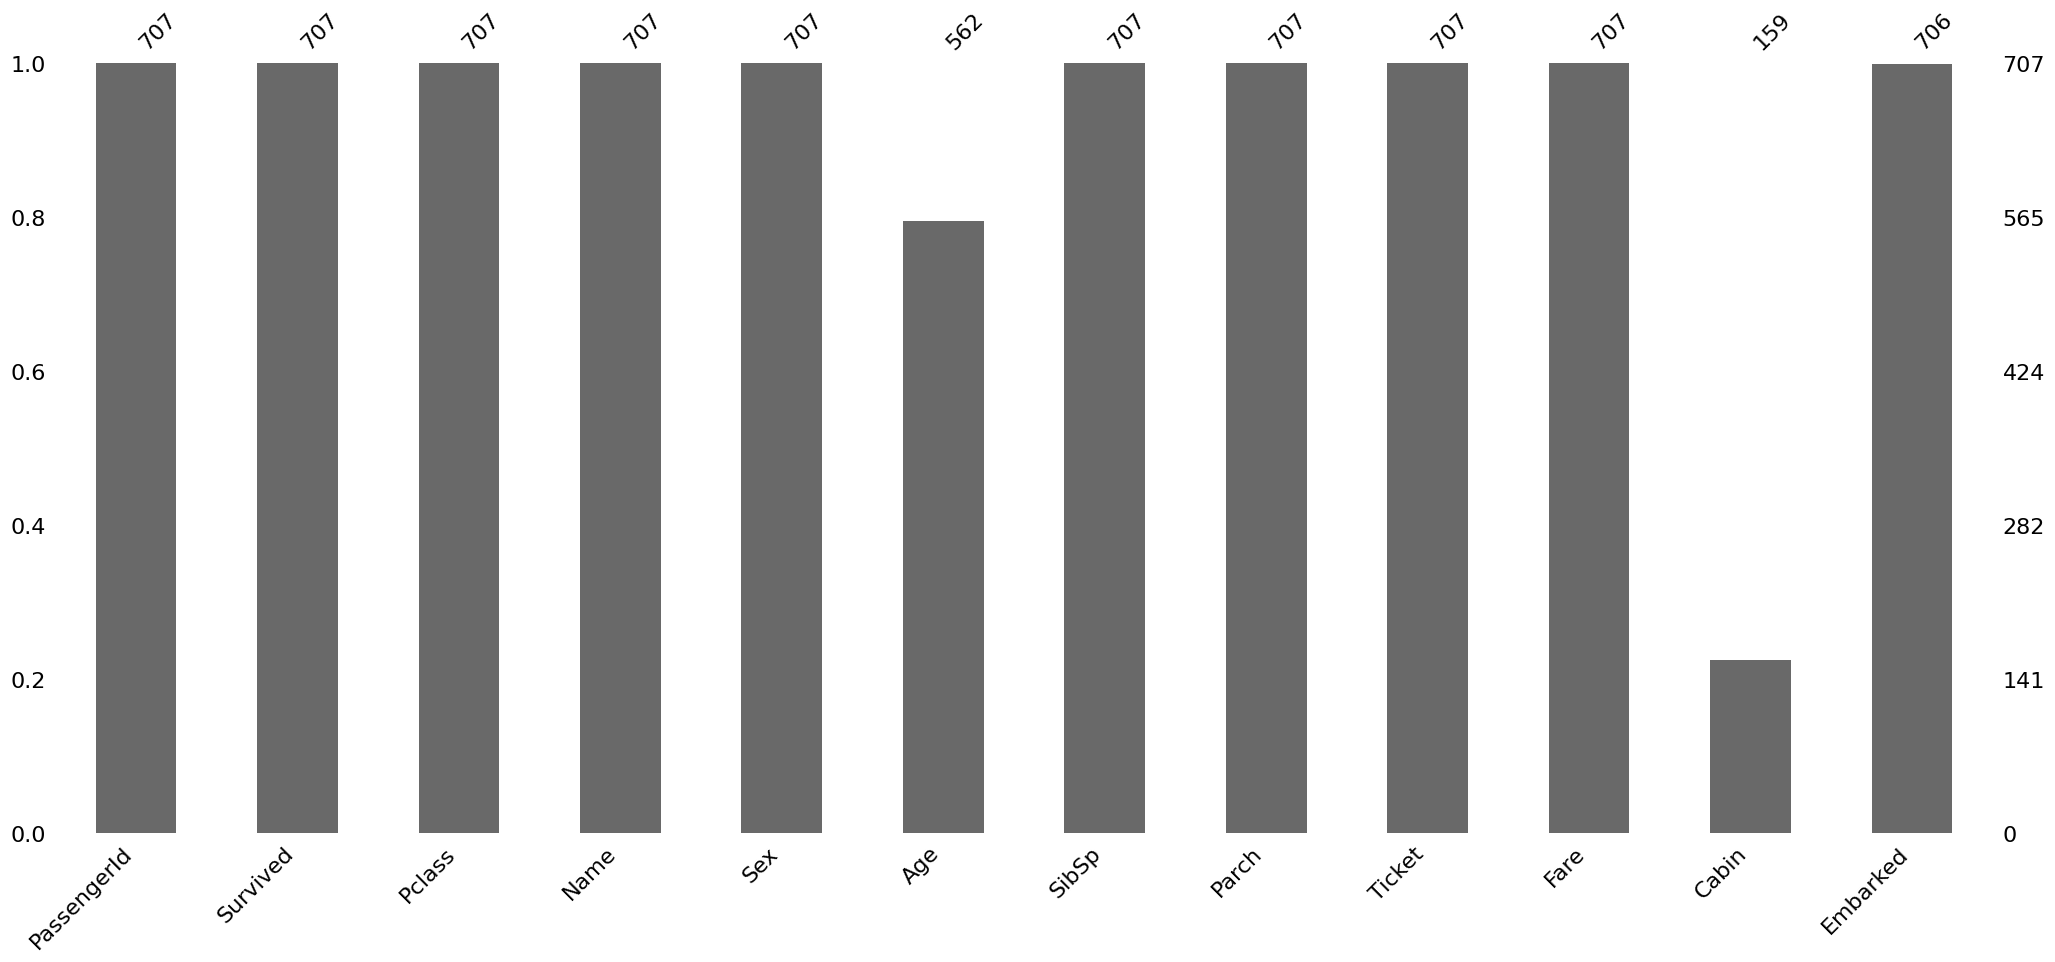

In [7]:
msno.bar(dstitanic)

<Axes: >

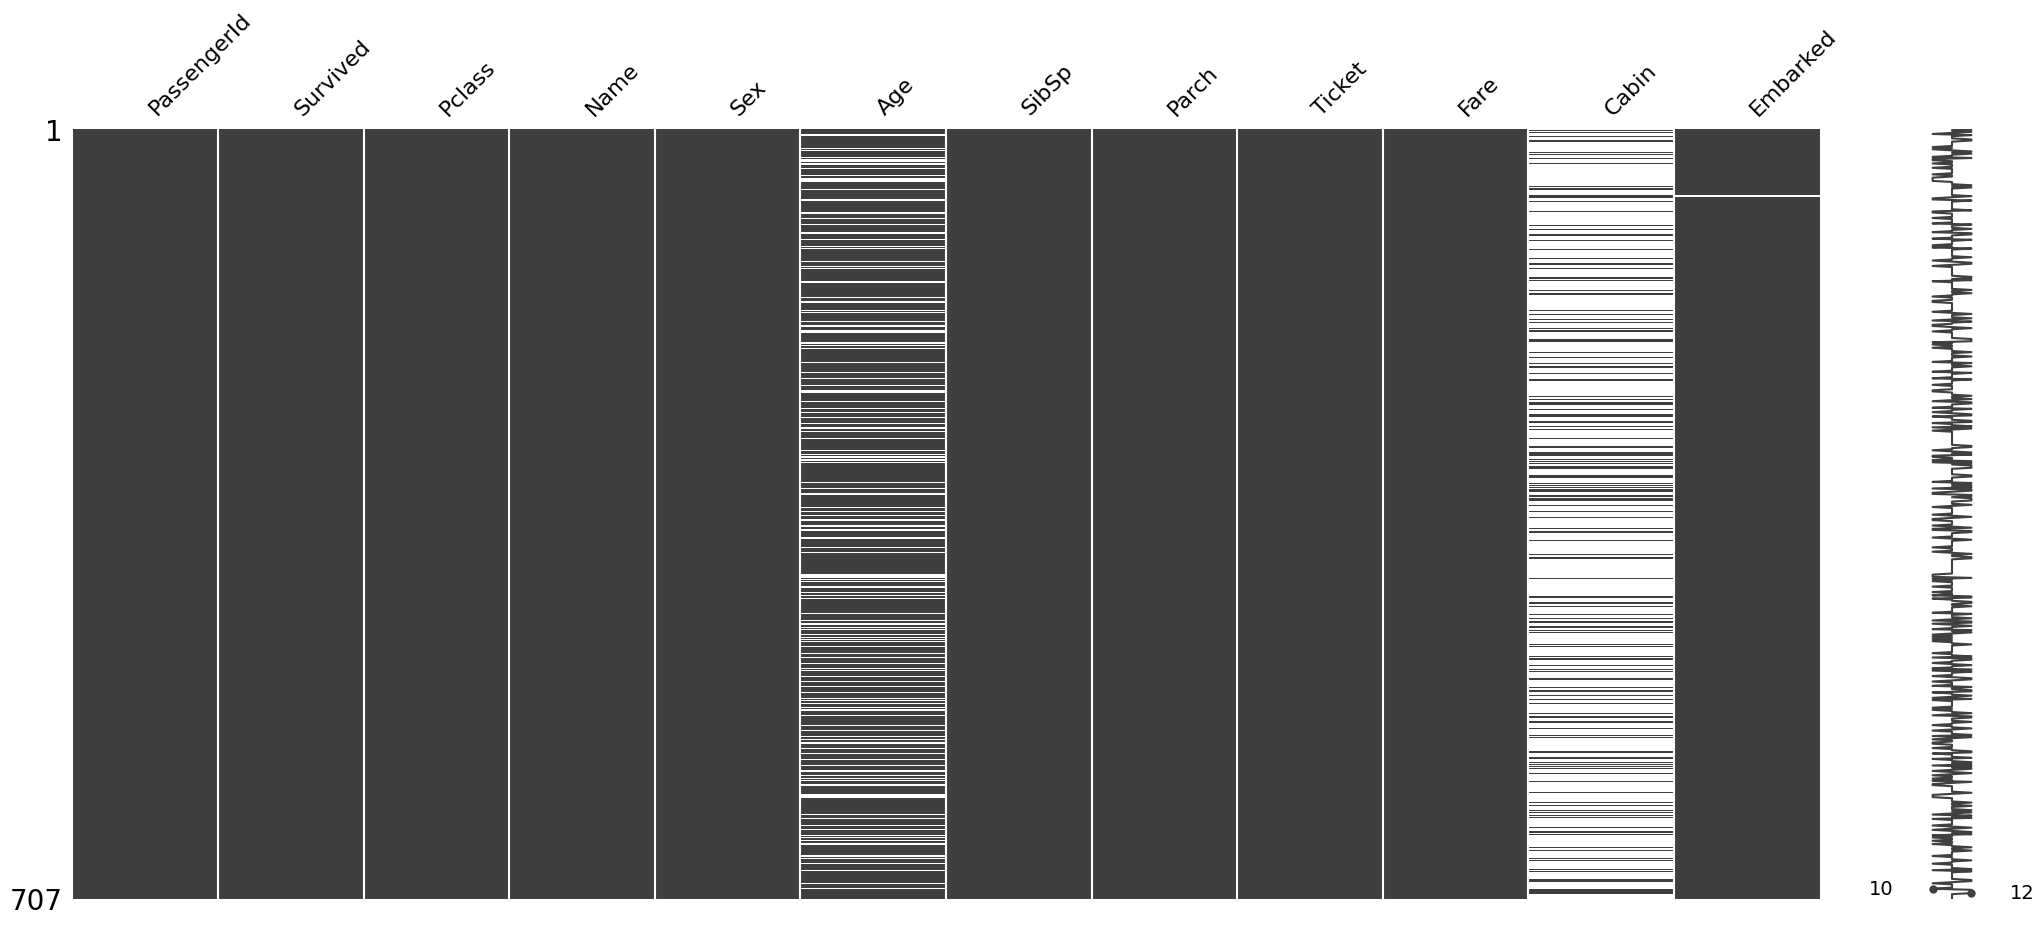

In [8]:
msno.matrix(dstitanic)

### Missing Value

In [9]:
# menghapus kolom 'PassengerId', 'Name',''Ticket, 'Cabin', sebab tidak berpengaruh terhadap data/kolom lain.
dstitanic.drop(columns=["PassengerId", "Name","Ticket", "Cabin"], axis=1, inplace=True)
dstitanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.1,S
4,0,3,male,35.0,0,0,8.05,S
...,...,...,...,...,...,...,...,...
702,0,3,female,18.0,0,1,144.542,C
703,0,3,male,25.0,0,0,77.417,Q
704,0,3,male,26.0,1,0,78.542,S
705,0,2,male,39.0,0,0,26,S


In [10]:
dstitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  707 non-null    int64  
 1   Pclass    707 non-null    int64  
 2   Sex       707 non-null    object 
 3   Age       562 non-null    float64
 4   SibSp     707 non-null    int64  
 5   Parch     707 non-null    int64  
 6   Fare      707 non-null    object 
 7   Embarked  706 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 44.3+ KB


In [11]:
# mengubah kolom Fare dikonversi ke tipe data numerik (float)
dstitanic['Fare'] = pd.to_numeric(dstitanic['Fare'], errors='coerce')

<Axes: >

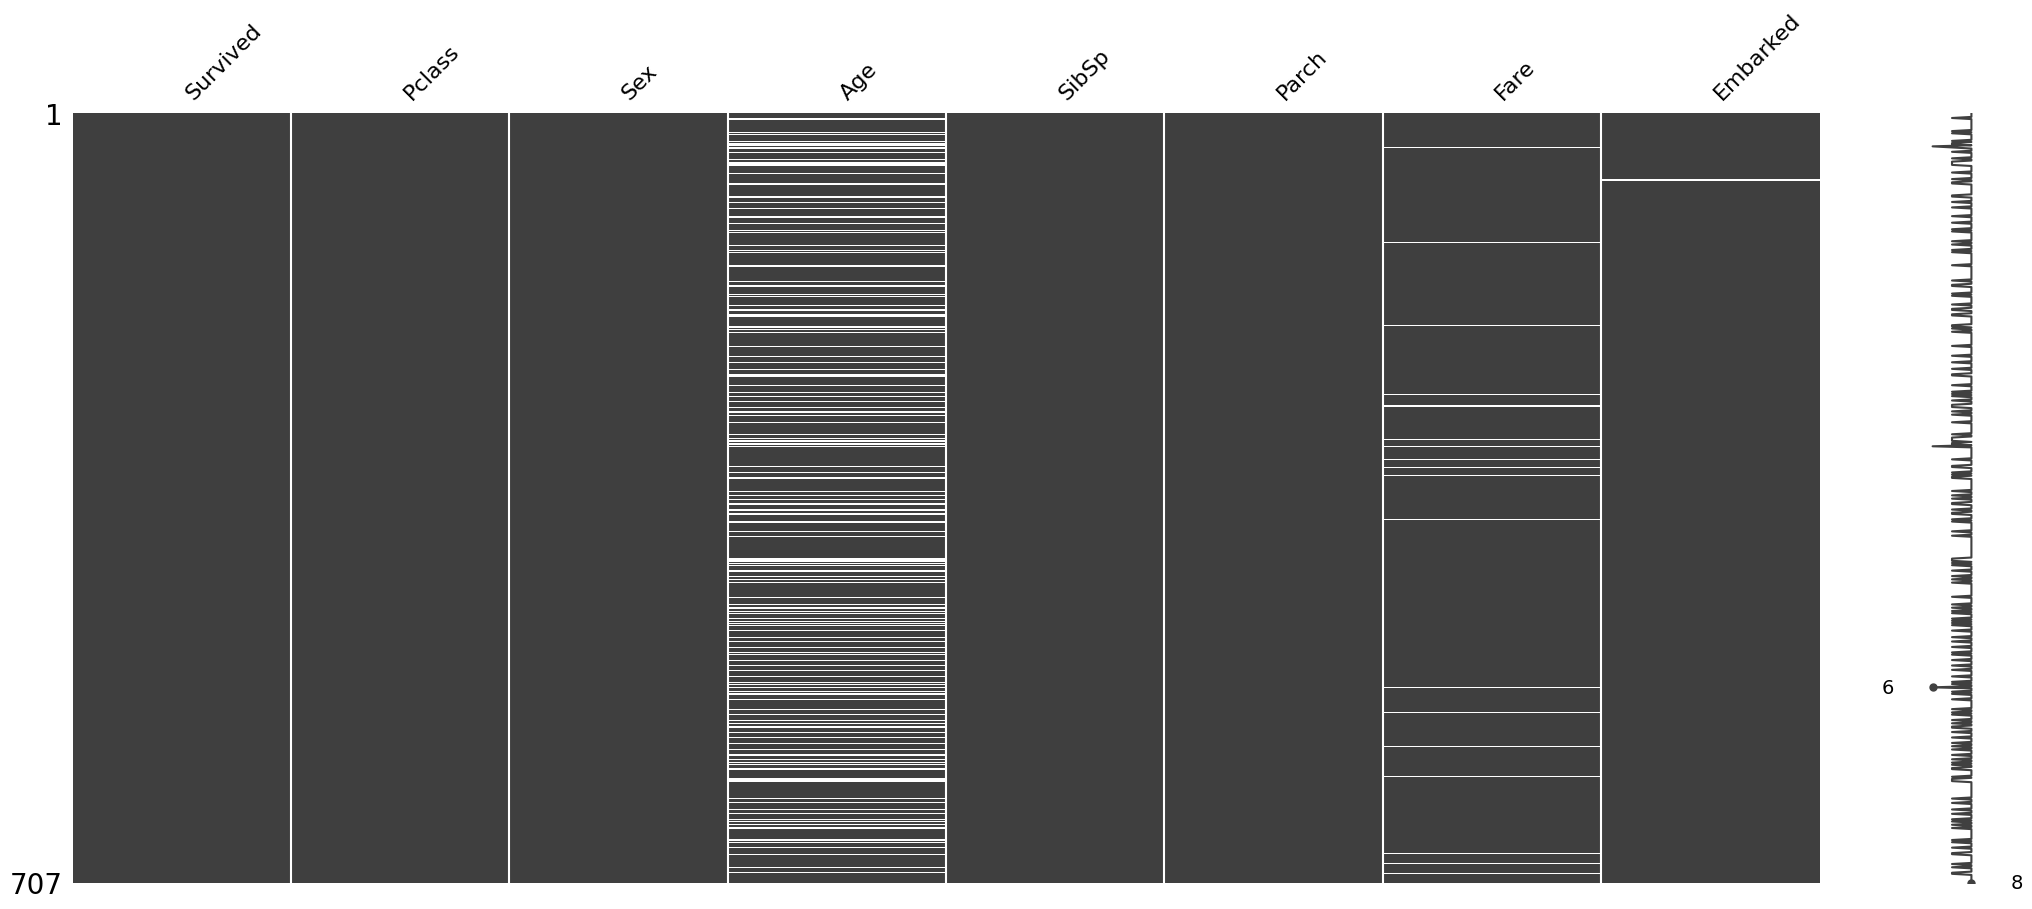

In [12]:
msno.matrix(dstitanic)

In [13]:
# mengisi Age dengan nilai tengah median
dstitanic['Age'].fillna(dstitanic['Age'].median(), inplace=True)
dstitanic

C:\Users\USER\AppData\Local\Temp\ipykernel_18880\273786196.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dstitanic['Age'].fillna(dstitanic['Age'].median(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S
...,...,...,...,...,...,...,...,...
702,0,3,female,18.0,0,1,144.542,C
703,0,3,male,25.0,0,0,77.417,Q
704,0,3,male,26.0,1,0,78.542,S
705,0,2,male,39.0,0,0,26.000,S


In [14]:
# mengisi Embarked dengan nilai terbanyak (modus)
dstitanic['Embarked'].fillna(dstitanic['Embarked'].mode()[0], inplace=True)
dstitanic

C:\Users\USER\AppData\Local\Temp\ipykernel_18880\1940747836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dstitanic['Embarked'].fillna(dstitanic['Embarked'].mode()[0], inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S
...,...,...,...,...,...,...,...,...
702,0,3,female,18.0,0,1,144.542,C
703,0,3,male,25.0,0,0,77.417,Q
704,0,3,male,26.0,1,0,78.542,S
705,0,2,male,39.0,0,0,26.000,S


In [15]:
# mengisi fare dengan nilai tengah median 
dstitanic['Fare'].fillna(dstitanic['Fare'].median(), inplace=True)
dstitanic

C:\Users\USER\AppData\Local\Temp\ipykernel_18880\768620988.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dstitanic['Fare'].fillna(dstitanic['Fare'].median(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S
...,...,...,...,...,...,...,...,...
702,0,3,female,18.0,0,1,144.542,C
703,0,3,male,25.0,0,0,77.417,Q
704,0,3,male,26.0,1,0,78.542,S
705,0,2,male,39.0,0,0,26.000,S


<Axes: >

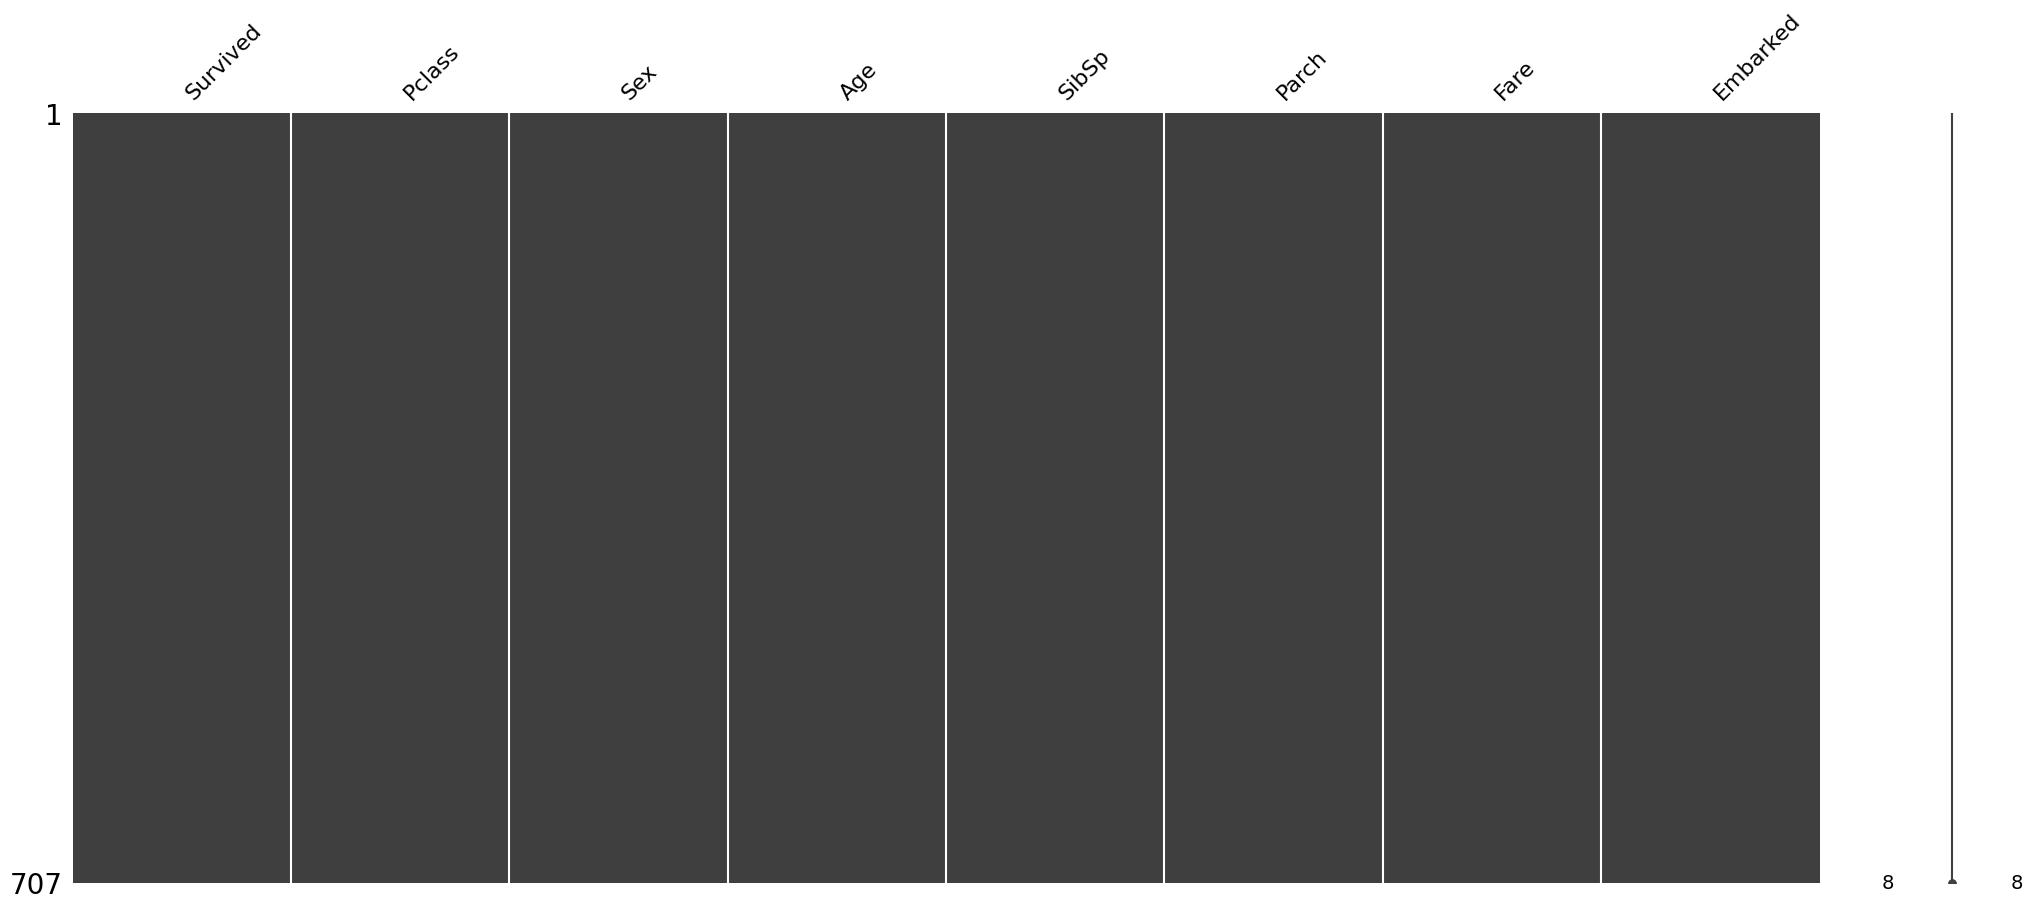

In [16]:
msno.matrix(dstitanic)

### Outlier IQR

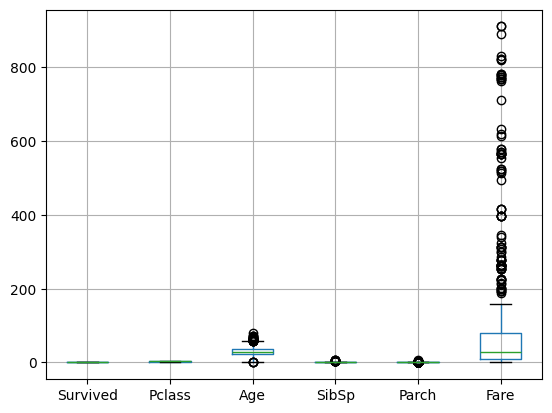

In [17]:
dstitanic.boxplot()
plt.show()

In [18]:
# menangani outlier pada kolom 'Age','SibSp','Parch','Ticket','Fare'
limits = {}  # Dictionary untuk menyimpan batas bawah dan atas outlier
cols = ['Age', 'SibSp', 'Parch', 'Fare']
for col in cols:
    Q1 = dstitanic[col].quantile(0.25) 
    Q3 = dstitanic[col].quantile(0.75)  
    IQR = Q3 - Q1                         
    lower = Q1 - 1.5 * IQR                
    upper = Q3 + 1.5 * IQR                

    limits[col] = (lower, upper)
    dstitanic[col] = np.where(
        dstitanic[col] > upper, upper,
        np.where(dstitanic[col] < lower, lower, dstitanic[col])
    )


In [19]:
filteredData = dstitanic[
    (dstitanic['Fare'] < limits['Fare'][0]) | (dstitanic['Fare'] > limits['Fare'][1]) |
    (dstitanic['Age'] < limits['Age'][0]) | (dstitanic['Age'] > limits['Age'][1]) |
    (dstitanic['SibSp'] < limits['SibSp'][0]) | (dstitanic['SibSp'] > limits['SibSp'][1]) |
    (dstitanic['Parch'] < limits['Parch'][0]) | (dstitanic['Parch'] > limits['Parch'][1])
]
filteredData.shape

(0, 8)

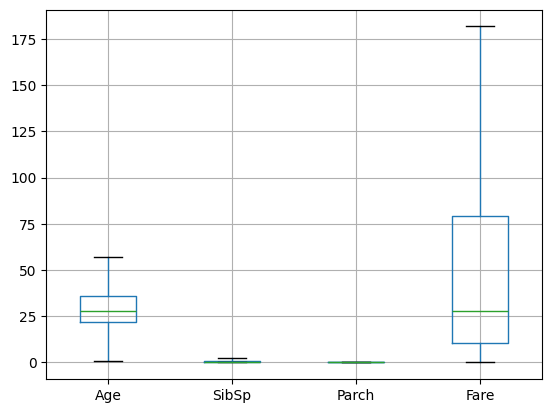

In [20]:
dstitanic.boxplot(column=['Age', 'SibSp', 'Parch', 'Fare'])
plt.show()

In [21]:
dstitanic.shape

(707, 8)